# Task 3 forecasting and analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import os
from datetime import datetime, timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

import os
from datetime import datetime
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src import forecasting

In [ ]:
def main():
    file_path = "tesla.csv"  # <-- Your Tesla CSV file
    output_dir = "data/output"
    os.makedirs(output_dir, exist_ok=True)

    # Load and split data
    df = load_tesla_data(file_path)
    train_data, test_data = train_test_split(df)

    # Train model & forecast
    model = fit_arima_model(train_data)
    forecast_series, conf_df = forecast_future(model, df.index[-1], months_ahead=6)

    # Plot results
    plot_forecast(train_data, test_data, forecast_series, conf_df,
                  os.path.join(output_dir, "tesla_forecast_6months.png"))

    # Save forecast data
    forecast_results = pd.concat([forecast_series, conf_df], axis=1)
    forecast_results.columns = ['Forecast', 'Lower', 'Upper']
    forecast_results.to_csv(os.path.join(output_dir, "tesla_forecast_6months.csv"))

    # Analyze and save analysis
    last_actual_price = df['Adj Close'].iloc[-1]
    analysis_text = analyze_forecast(forecast_series, conf_df, last_actual_price)
    with open(os.path.join(output_dir, "tesla_forecast_analysis.txt"), "w") as f:
        f.write(analysis_text)

    print(analysis_text)

# to import the modules 


In [2]:

from src.forecasting import load_tesla_data, train_test_split, fit_arima_model, forecast_future, plot_forecast, analyze_forecast

# load TESLA Data

In [3]:

# Load Tesla data
file_path = 'F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/scrap data/TSLA_data.csv'
output_dir = "data/output"
os.makedirs(output_dir, exist_ok=True)
df = load_tesla_data(file_path)

# split Data

In [4]:
#from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_data, test_data = train_test_split(df)
print(f"Train data length: {len(train_data)}, Test data length: {len(test_data)}")



Train data length: 2409, Test data length: 126
Train data length: 2409, Test data length: 126


 # Train model & forecast
   

In [5]:
# Train model & forecast
model = fit_arima_model(train_data)
#to print the model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=15853.543, Time=6.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=15862.568, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=15863.091, Time=0.86 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=15863.548, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=15861.982, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=15862.382, Time=0.53 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=15861.948, Time=0.53 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=15841.565, Time=5.87 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=15839.779, Time=2.24 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=15840.664, Time=11.30 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=15840.707, Time=3.78 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=15841.302, Time=7.23 sec
 ARIMA(0,1,0)(2,0,0)[12]             : AIC=15838.827, Time=0.71 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=15861.270, Time=0.21 sec
 ARI

## Forecasting 

In [7]:
# Forecast future prices
forecast_series, conf_df = forecast_future(model, df.index[-1], months_ahead=6)
print(f"Forecast series length: {len(forecast_series)}")
print(f"Confidence intervals shape: {conf_df.shape}")
#to mprint the forecast series
print(forecast_series)
print(conf_df)


Forecast series length: 126
Confidence intervals shape: (126, 2)
2025-07-31   NaN
2025-08-01   NaN
2025-08-04   NaN
2025-08-05   NaN
2025-08-06   NaN
              ..
2026-01-16   NaN
2026-01-19   NaN
2026-01-20   NaN
2026-01-21   NaN
2026-01-22   NaN
Freq: B, Length: 126, dtype: float64
                 Lower       Upper
2025-07-31  383.829618  409.226489
2025-08-01  379.811858  415.728457
2025-08-04  378.827251  422.815922
2025-08-05  375.551228  426.344970
2025-08-06  369.803312  426.592443
...                ...         ...
2026-01-16  236.004935  551.347366
2026-01-19  235.325721  552.026635
2026-01-20  234.649441  552.703035
2026-01-21  233.975902  553.376448
2026-01-22  233.305263  554.047105

[126 rows x 2 columns]


# Visualization

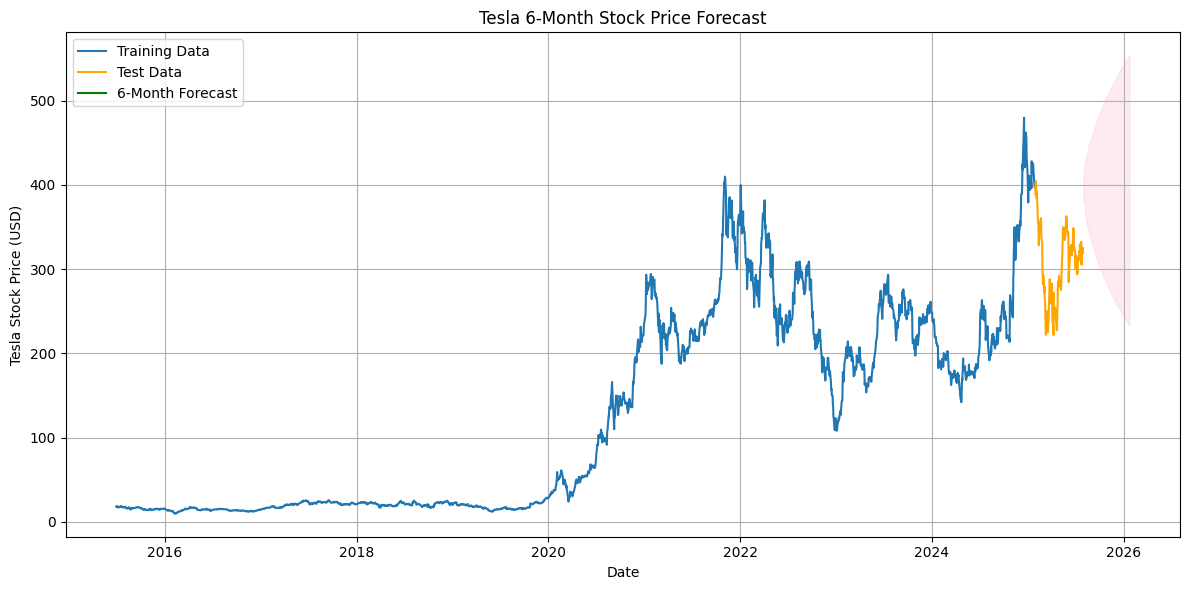

In [8]:
 # Plot results
plot_forecast(train_data, test_data, forecast_series, conf_df,
                os.path.join(output_dir, "tesla_forecast_6months.png"))

# save the result 

In [9]:
# Save forecast data
forecast_results = pd.concat([forecast_series, conf_df], axis=1)
forecast_results.columns = ['Forecast', 'Lower', 'Upper']
forecast_results.to_csv(os.path.join(output_dir, "tesla_forecast_6months.csv"))


Analyzing and keeping  analysis

In [12]:
# Analyze and save analysis
last_actual_price = df['Close'].iloc[-1]
analysis_text = analyze_forecast(forecast_series, conf_df, last_actual_price)
print(analysis_text)

📈 Tesla 6-Month Forecast Analysis
----------------------------------------
Last Actual Price: $319.04
Predicted Price Range: $nan - $nan
Lowest Forecast (Date: NaT): $nan
Highest Forecast (Date: NaT): $nan
Expected % Change in 6 Months: nan%
Confidence Interval Range: $233.31 - $554.05
